In [ ]:
#POWER ANALYSIS FOR MEDIUM EFFECT SIZE

import numpy as np
from statsmodels.stats.power import FTestAnovaPower

# Setup
power_obj = FTestAnovaPower()

# Medium effect size by convention
f_medium = 0.25

# 2 (Line) x 3 (BMP) = 6 groups
k_groups = 6
alpha = 0.05
target_power = 0.80

# 1) Total n needed for 80% power
n_total_80 = power_obj.solve_power(
    effect_size=f_medium,
    power=target_power,
    alpha=alpha,
    k_groups=k_groups
)

print(f"Total n needed for 80% power (f=0.25): {n_total_80:.1f}")
print(f"Per group ~ {n_total_80 / k_groups:.2f} samples")

# 2) Power for a range of total n
print("\nPower vs total n (medium effect, f=0.25):")
for n_total in [60, 90, 120, 150, 180, 210]:
    pw = power_obj.solve_power(
        effect_size=f_medium,
        nobs=n_total,
        alpha=alpha,
        k_groups=k_groups
    )
    print(f"  n_total = {n_total:3d} "
          f"({n_total/k_groups:4.1f} per group) → power = {pw:.3f}")


Total n needed for 80% power (f=0.25): 210.8
Per group ~ 35.14 samples

Power vs total n (medium effect, f=0.25):
  n_total =  60 (10.0 per group) → power = 0.249
  n_total =  90 (15.0 per group) → power = 0.382
  n_total = 120 (20.0 per group) → power = 0.510
  n_total = 150 (25.0 per group) → power = 0.625
  n_total = 180 (30.0 per group) → power = 0.721
  n_total = 210 (35.0 per group) → power = 0.798


In [ ]:
#POWER ANALYSIS FOR SMALL POWER

import numpy as np
from statsmodels.stats.power import FTestAnovaPower

# --------------------------
# Setup
# --------------------------
power_obj = FTestAnovaPower()

# Small effect size by convention
f_small = 0.10

# 2 (Line) x 3 (BMP) = 6 groups
k_groups = 6
alpha = 0.05
target_power = 0.80

# --------------------------
# 1) Total n needed for 80% power
# --------------------------
n_total_80 = power_obj.solve_power(
    effect_size=f_small,
    power=target_power,
    alpha=alpha,
    k_groups=k_groups
)

print(f"Total n needed for 80% power (f=0.10): {n_total_80:.1f}")
print(f"Per group ~ {n_total_80 / k_groups:.2f} samples")

# --------------------------
# 2) Power for a range of total n
# --------------------------
print("\nPower vs total n (small effect, f=0.10):")
for n_total in [120, 180, 240, 300, 360, 420]:
    pw = power_obj.solve_power(
        effect_size=f_small,
        nobs=n_total,
        alpha=alpha,
        k_groups=k_groups
    )
    print(f"  n_total = {n_total:3d} "
          f"({n_total/k_groups:4.1f} per group) → power = {pw:.3f}")


Total n needed for 80% power (f=0.10): 1288.3
Per group ~ 214.72 samples

Power vs total n (small effect, f=0.10):
  n_total = 120 (20.0 per group) → power = 0.106
  n_total = 180 (30.0 per group) → power = 0.141
  n_total = 240 (40.0 per group) → power = 0.179
  n_total = 300 (50.0 per group) → power = 0.219
  n_total = 360 (60.0 per group) → power = 0.260
  n_total = 420 (70.0 per group) → power = 0.302


In [ ]:
#checking columns for data

import pandas as pd

df = pd.read_excel("Combined_data_final2.xlsx")
print(repr(df.columns.tolist()))



['Line ', 'BMP ', 'MCM2_Nestin']


In [ ]:
#reformatting input

df = pd.read_excel("Combined_data_final2.xlsx")

# Strip leading/trailing spaces
df.columns = df.columns.str.strip()

# OPTIONAL: make them lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.columns)


Index(['line', 'bmp', 'mcm2_nestin'], dtype='object')


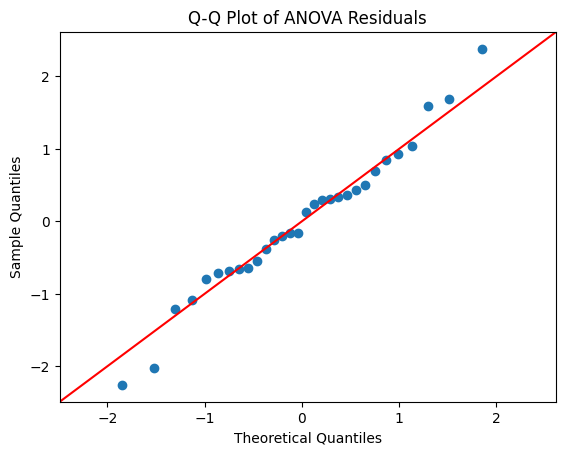

Shapiro–Wilk test on ANOVA residuals
W = 0.9834
p-value = 0.9074
Residuals are consistent with normality ✅


In [ ]:
#STEP 1 - TEST FOR NORMALITY

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fit 2-way ANOVA model with cleaned names
model = ols('mcm2_nestin ~ C(line) * C(bmp)', data=df).fit()

# Residuals
residuals = model.resid

# -----------------------------
# Q-Q plot of residuals
# -----------------------------
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of ANOVA Residuals")
plt.show()

# -----------------------------
# Shapiro–Wilk test on residuals
# -----------------------------
stat, p = stats.shapiro(residuals)

print("Shapiro–Wilk test on ANOVA residuals")
print(f"W = {stat:.4f}")
print(f"p-value = {p:.4g}")

if p > 0.05:
    print("Residuals are consistent with normality ✅")
else:
    print("Residuals deviate from normality ⚠️")


In [ ]:
# -----------------------------
# Levene's test across all 6 groups
# -----------------------------
groups = []

for (line, bmp), group in df.groupby([line_col, bmp_col]):
    print(f"Group: {line}, BMP={bmp}, n={len(group[value_col])}")
    groups.append(group[value_col].values)

stat, p = levene(*groups, center='median')  # center='median' is more robust

print("\nLevene's test for homogeneity of variance (all groups)")
print(f"Statistic = {stat:.4f}")
print(f"p-value   = {p:.4g}")

if p > 0.05:
    print("Variances can be considered homogeneous ✅")
else:
    print("Evidence of unequal variances across groups ⚠️")


Group: AD, BMP=0 BMP, n=5
Group: AD, BMP=100 BMP, n=5
Group: AD, BMP=50 BMP, n=5
Group: Control, BMP=0 BMP, n=5
Group: Control, BMP=100 BMP, n=5
Group: Control, BMP=50 BMP, n=5

Levene's test for homogeneity of variance (all groups)
Statistic = 0.3514
p-value   = 0.8762
Variances can be considered homogeneous ✅


<Figure size 800x500 with 0 Axes>

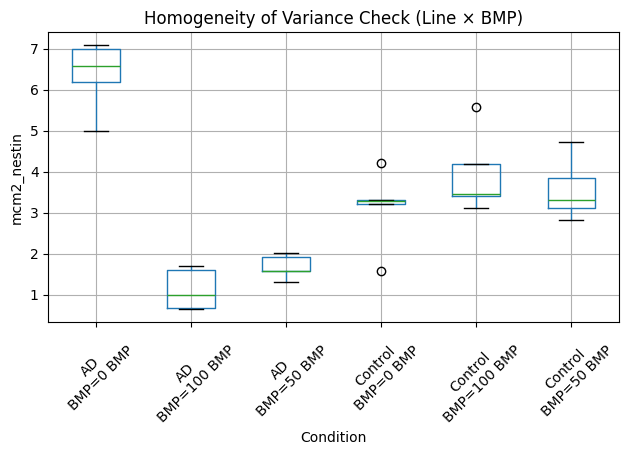

In [ ]:
#BOXPLOT

import matplotlib.pyplot as plt

df["group_label"] = df.apply(
    lambda row: f"{row[line_col]}\nBMP={row[bmp_col]}",
    axis=1
)

plt.figure(figsize=(8,5))
df.boxplot(column=value_col, by="group_label")
plt.title("Homogeneity of Variance Check (Line × BMP)")
plt.suptitle("")
plt.xlabel("Condition")
plt.ylabel(value_col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

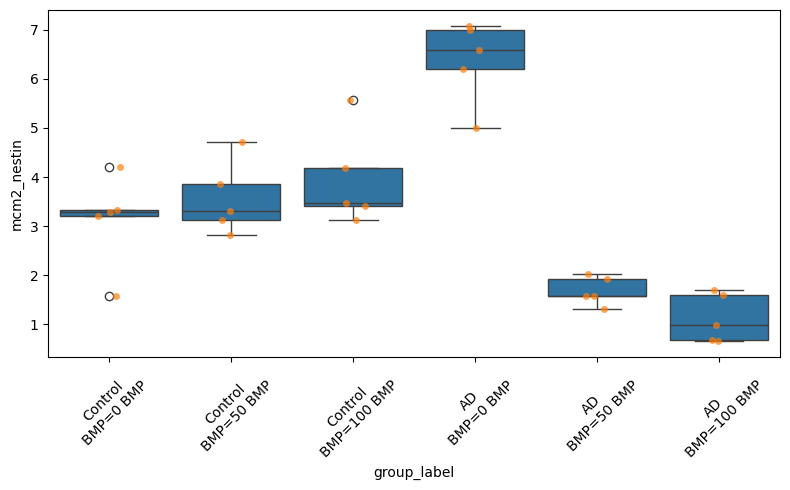

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="group_label", y=value_col)
sns.stripplot(data=df, x="group_label", y=value_col, dodge=False, alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#CALCULATING VARIANCE

import pandas as pd

# assuming df, line_col, bmp_col, value_col already defined
summary = (
    df
    .groupby([line_col, bmp_col])[value_col]
    .agg(['count', 'mean', 'std', 'var'])
    .reset_index()
)

print(summary)

# ratio of largest to smallest variance
var_max = summary['var'].max()
var_min = summary['var'].min()
print(f"\nMax variance / Min variance = {var_max / var_min:.2f}")


      line      bmp  count      mean       std       var
0       AD    0 BMP      5  6.368000  0.848805  0.720470
1       AD  100 BMP      5  1.128000  0.500070  0.250070
2       AD   50 BMP      5  1.680000  0.291204  0.084800
3  Control    0 BMP      5  3.120538  0.953260  0.908704
4  Control  100 BMP      5  3.953867  0.988382  0.976899
5  Control   50 BMP      5  3.568415  0.744105  0.553693

Max variance / Min variance = 11.52


In [ ]:
#RUN ANOVA - NORMAL AND ROBUST

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.read_excel("Combined_data_final2.xlsx")

# Strip leading/trailing spaces
df.columns = df.columns.str.strip()

# OPTIONAL: make them lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.columns)

# Set your column names here based on the printout
line_col = "line"
bmp_col = "bmp"
value_col = "mcm2_nestin"    # change if yours is e.g. "proliferating_cells"

formula = f'{value_col} ~ C({line_col}) * C({bmp_col})'

# Ordinary (non-robust) OLS model
model = ols(formula, data=df).fit()

# Classical ANOVA table (Type II or III – here Type II)
anova_classical = anova_lm(model, typ=2)
print("\nClassical 2-way ANOVA (homoscedastic):")
print(anova_classical)

# Robust ANOVA with HC3 (heteroskedasticity-robust)
anova_robust = anova_lm(model, typ=2, robust='hc3')

print("\nRobust 2-way ANOVA (HC3):")
print(anova_robust)

# Get robust covariance results for the model
robust_res = model.get_robustcov_results(cov_type='HC3')

print("\nRobust OLS summary (HC3):")
print(robust_res.summary())



Index(['line', 'bmp', 'mcm2_nestin'], dtype='object')

Classical 2-way ANOVA (homoscedastic):
                   sum_sq    df          F        PR(>F)
C(line)          1.792966   1.0   3.078374  9.210088e-02
C(bmp)          31.187612   2.0  26.773278  7.722977e-07
C(line):C(bmp)  53.451141   2.0  45.885599  6.299826e-09
Residual        13.978540  24.0        NaN           NaN

Robust 2-way ANOVA (HC3):
                   sum_sq    df          F        PR(>F)
C(line)          8.304675   1.0  14.258442  9.260882e-04
C(bmp)          37.310682   2.0  32.029681  1.679688e-07
C(line):C(bmp)  34.951362   2.0  30.004302  2.955628e-07
Residual        13.978540  24.0        NaN           NaN

Robust OLS summary (HC3):
                            OLS Regression Results                            
Dep. Variable:            mcm2_nestin   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-sta

In [ ]:
import pandas as pd

anova_table = pd.DataFrame({
    "sum_sq": {
        "C(line)": 1.792966,
        "C(bmp)": 31.187612,
        "C(line):C(bmp)": 53.451141,
        "Residual": 13.978540
    }
})
ss_total = anova_table["sum_sq"].sum()

anova_table["eta_sq"] = anova_table["sum_sq"] / ss_total
anova_table["partial_eta_sq"] = anova_table["sum_sq"] / (
    anova_table["sum_sq"] + anova_table.loc["Residual", "sum_sq"]
)

print(anova_table)



                   sum_sq    eta_sq  partial_eta_sq
C(line)          1.792966  0.017856        0.113684
C(bmp)          31.187612  0.310602        0.690509
C(line):C(bmp)  53.451141  0.532327        0.792695
Residual        13.978540  0.139214        0.500000


In [ ]:
#POST HOC TESTS

print("\nPost-hoc: AD vs Control at each BMP\n")

for bmp in df["bmp"].unique():
    subset = df[df["bmp"] == bmp]
    ad = subset[subset["line"] == "AD"]["mcm2_nestin"]
    ctrl = subset[subset["line"] == "Control"]["mcm2_nestin"]

    t, p = stats.ttest_ind(ad, ctrl, equal_var=False)
    print(f"BMP = {bmp:>7}: t = {t:6.2f}, p = {p:.4g}")

    from itertools import combinations

print("\nPost-hoc: BMP comparisons within each Line\n")

for line in df["line"].unique():
    print(f"\nLINE = {line}")
    subset = df[df["line"] == line]

    for bmp1, bmp2 in combinations(df["bmp"].unique(), 2):
        g1 = subset[subset["bmp"] == bmp1]["mcm2_nestin"]
        g2 = subset[subset["bmp"] == bmp2]["mcm2_nestin"]

        t, p = stats.ttest_ind(g1, g2, equal_var=False)
        print(f"  {bmp1} vs {bmp2}: t = {t:6.2f}, p = {p:.4g}")




Post-hoc: AD vs Control at each BMP

BMP =   0 BMP: t =   5.69, p = 0.0004829
BMP =  50 BMP: t =  -5.28, p = 0.00288
BMP = 100 BMP: t =  -5.70, p = 0.001313

Post-hoc: BMP comparisons within each Line


LINE = Control
  0 BMP vs 50 BMP: t =  -0.83, p = 0.433
  0 BMP vs 100 BMP: t =  -1.36, p = 0.2119
  50 BMP vs 100 BMP: t =  -0.70, p = 0.5072

LINE = AD
  0 BMP vs 50 BMP: t =  11.68, p = 8.849e-05
  0 BMP vs 100 BMP: t =  11.89, p = 1.22e-05
  50 BMP vs 100 BMP: t =   2.13, p = 0.07381


In [ ]:
#HOLM CORRECTIONS

from statsmodels.stats.multitest import multipletests

pvals = []
labels = []

for bmp_level in df["bmp"].unique():
    subset = df[df["bmp"] == bmp_level]
    ad = subset[subset["line"] == "AD"][value_col]
    ctrl = subset[subset["line"] == "Control"][value_col]
    _, p = stats.ttest_ind(ad, ctrl, equal_var=False)
    pvals.append(p)
    labels.append(f"AD vs Ctrl @ {bmp_level}")

reject, p_adj, _, _ = multipletests(pvals, method="holm")

print("\nHolm-corrected: AD vs Control")
for lab, raw, adj, sig in zip(labels, pvals, p_adj, reject):
    print(f"{lab:18s} p_raw={raw:.4g} p_adj={adj:.4g} signif={sig}")

pvals = []
labels = []

subset = df[df["line"] == "Control"]
bmps = df["bmp"].unique()

for i in range(len(bmps)):
    for j in range(i+1, len(bmps)):
        g1 = subset[subset["bmp"] == bmps[i]][value_col]
        g2 = subset[subset["bmp"] == bmps[j]][value_col]
        _, p = stats.ttest_ind(g1, g2, equal_var=False)
        pvals.append(p)
        labels.append(f"{bmps[i]} vs {bmps[j]}")

reject, p_adj, _, _ = multipletests(pvals, method="holm")

print("\nHolm-corrected: BMP comparisons (Control)")
for lab, raw, adj, sig in zip(labels, pvals, p_adj, reject):
    print(f"{lab:22s} p_raw={raw:.4g} p_adj={adj:.4g} signif={sig}")

pvals = []
labels = []

subset = df[df["line"] == "AD"]
bmps = df["bmp"].unique()

for i in range(len(bmps)):
    for j in range(i+1, len(bmps)):
        g1 = subset[subset["bmp"] == bmps[i]][value_col]
        g2 = subset[subset["bmp"] == bmps[j]][value_col]
        _, p = stats.ttest_ind(g1, g2, equal_var=False)
        pvals.append(p)
        labels.append(f"{bmps[i]} vs {bmps[j]}")

reject, p_adj, _, _ = multipletests(pvals, method="holm")

print("\nHolm-corrected: BMP comparisons (AD)")
for lab, raw, adj, sig in zip(labels, pvals, p_adj, reject):
    print(f"{lab:22s} p_raw={raw:.4g} p_adj={adj:.4g} signif={sig}")



Holm-corrected: AD vs Control
AD vs Ctrl @ 0 BMP p_raw=0.0004829 p_adj=0.001449 signif=True
AD vs Ctrl @ 50 BMP p_raw=0.00288 p_adj=0.00288 signif=True
AD vs Ctrl @ 100 BMP p_raw=0.001313 p_adj=0.002625 signif=True

Holm-corrected: BMP comparisons (Control)
0 BMP vs 50 BMP        p_raw=0.433 p_adj=0.8659 signif=False
0 BMP vs 100 BMP       p_raw=0.2119 p_adj=0.6356 signif=False
50 BMP vs 100 BMP      p_raw=0.5072 p_adj=0.8659 signif=False

Holm-corrected: BMP comparisons (AD)
0 BMP vs 50 BMP        p_raw=8.849e-05 p_adj=0.000177 signif=True
0 BMP vs 100 BMP       p_raw=1.22e-05 p_adj=3.659e-05 signif=True
50 BMP vs 100 BMP      p_raw=0.07381 p_adj=0.07381 signif=False


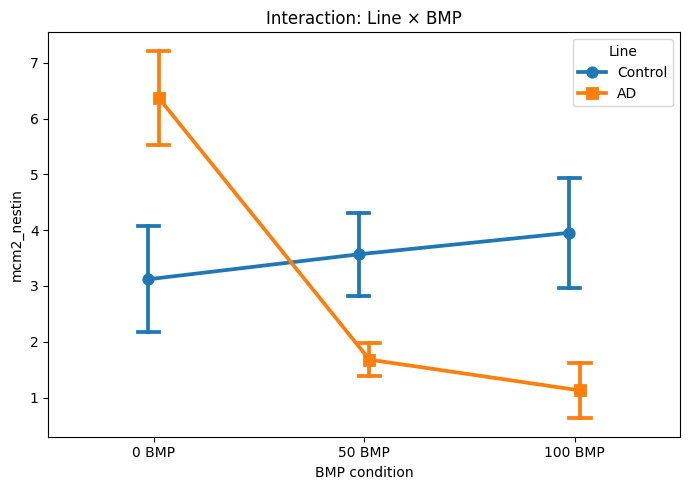


Post-hoc: AD vs Control at each BMP



KeyError: 'value_col'

In [ ]:
#INTERACTION PLOT

import seaborn as sns
import matplotlib.pyplot as plt

# set this to your actual outcome column name
value_col = "mcm2_nestin"  # e.g. "cells_prolif"

plt.figure(figsize=(7,5))

sns.pointplot(
    data=df,
    x="bmp",
    y=value_col,
    hue="line",
    errorbar='sd',
    dodge=True,
    markers=["o", "s"],
    capsize=0.1
)

plt.title("Interaction: Line × BMP")
plt.xlabel("BMP condition")
plt.ylabel(value_col)
plt.legend(title="Line")
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_sd = np.sqrt(((nx-1)*x.var(ddof=1) + (ny-1)*y.var(ddof=1)) / (nx+ny-2))
    return (x.mean() - y.mean()) / pooled_sd

print("\nCohen's d: AD vs Control at each BMP\n")

for bmp_level in df["bmp"].unique():
    subset = df[df["bmp"] == bmp_level]
    ad = subset[subset["line"] == "AD"][value_col]
    ctrl = subset[subset["line"] == "Control"][value_col]

    d = cohens_d(ad, ctrl)
    print(f"BMP = {bmp_level:>7} → Cohen's d = {d:6.2f}")




Cohen's d: AD vs Control at each BMP

BMP =   0 BMP → Cohen's d =   3.60
BMP =  50 BMP → Cohen's d =  -3.34
BMP = 100 BMP → Cohen's d =  -3.61
